<a href="https://colab.research.google.com/github/Swarn36/Data_Analysis/blob/main/Airlines_Portfolio_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Objective:
In this project I will try to `maximize` the profitability of the airlines dataset. To achieve this, I may need to increase the `occupancy rate` of the Airlines.

In [4]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#Database Connection

In [5]:
connection = sqlite3.connect('/content/travel.sqlite')
cursor = connection.cursor()

In [6]:
cursor.execute("""Select name from sqlite_master where type = 'table';""")
print("List of tables of the database")
table_list = [table[0] for table in cursor.fetchall()]
table_list

List of tables of the database


['aircrafts_data',
 'airports_data',
 'boarding_passes',
 'bookings',
 'flights',
 'seats',
 'ticket_flights',
 'tickets']

#Database Exploration

In [7]:
aircrafts_data = pd.read_sql_query("select * from aircrafts_data", connection)
aircrafts_data

,aircraft_code,model,range
0,773,"{""en"": ""Boeing 777-300"", ""ru"": ""Боинг 777-300""}",11100
1,763,"{""en"": ""Boeing 767-300"", ""ru"": ""Боинг 767-300""}",7900
2,SU9,"{""en"": ""Sukhoi Superjet-100"", ""ru"": ""Сухой Суп...",3000
3,320,"{""en"": ""Airbus A320-200"", ""ru"": ""Аэробус A320-...",5700
4,321,"{""en"": ""Airbus A321-200"", ""ru"": ""Аэробус A321-...",5600
5,319,"{""en"": ""Airbus A319-100"", ""ru"": ""Аэробус A319-...",6700
6,733,"{""en"": ""Boeing 737-300"", ""ru"": ""Боинг 737-300""}",4200
7,CN1,"{""en"": ""Cessna 208 Caravan"", ""ru"": ""Сессна 208...",1200
8,CR2,"{""en"": ""Bombardier CRJ-200"", ""ru"": ""Бомбардье ...",2700


In [8]:
airports_data = pd.read_sql_query("select * from airports_data", connection)
airports_data.head()

,airport_code,airport_name,city,coordinates,timezone
0,YKS,"{""en"": ""Yakutsk Airport"", ""ru"": ""Якутск""}","{""en"": ""Yakutsk"", ""ru"": ""Якутск""}","(129.77099609375,62.0932998657226562)",Asia/Yakutsk
1,MJZ,"{""en"": ""Mirny Airport"", ""ru"": ""Мирный""}","{""en"": ""Mirnyj"", ""ru"": ""Мирный""}","(114.03900146484375,62.534698486328125)",Asia/Yakutsk
2,KHV,"{""en"": ""Khabarovsk-Novy Airport"", ""ru"": ""Хабар...","{""en"": ""Khabarovsk"", ""ru"": ""Хабаровск""}","(135.18800354004,48.5279998779300001)",Asia/Vladivostok
3,PKC,"{""en"": ""Yelizovo Airport"", ""ru"": ""Елизово""}","{""en"": ""Petropavlovsk"", ""ru"": ""Петропавловск-К...","(158.453994750976562,53.1679000854492188)",Asia/Kamchatka
4,UUS,"{""en"": ""Yuzhno-Sakhalinsk Airport"", ""ru"": ""Хом...","{""en"": ""Yuzhno-Sakhalinsk"", ""ru"": ""Южно-Сахали...","(142.718002319335938,46.8886985778808594)",Asia/Sakhalin


In [9]:
boarding_passes = pd.read_sql_query("select * from boarding_passes", connection)
boarding_passes.head()

,ticket_no,flight_id,boarding_no,seat_no
0,0005435212351,30625,1,2D
1,0005435212386,30625,2,3G
2,0005435212381,30625,3,4H
3,0005432211370,30625,4,5D
4,0005435212357,30625,5,11A


In [10]:
bookings = pd.read_sql_query("select * from bookings", connection)
bookings.head()

,book_ref,book_date,total_amount
0,00000F,2017-07-05 03:12:00+03,265700
1,000012,2017-07-14 09:02:00+03,37900
2,000068,2017-08-15 14:27:00+03,18100
3,000181,2017-08-10 13:28:00+03,131800
4,0002D8,2017-08-07 21:40:00+03,23600


In [11]:
flights = pd.read_sql_query("select * from flights", connection)
flights.head()

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,1185,PG0134,2017-09-10 09:50:00+03,2017-09-10 14:55:00+03,DME,BTK,Scheduled,319,\N,\N
1,3979,PG0052,2017-08-25 14:50:00+03,2017-08-25 17:35:00+03,VKO,HMA,Scheduled,CR2,\N,\N
2,4739,PG0561,2017-09-05 12:30:00+03,2017-09-05 14:15:00+03,VKO,AER,Scheduled,763,\N,\N
3,5502,PG0529,2017-09-12 09:50:00+03,2017-09-12 11:20:00+03,SVO,UFA,Scheduled,763,\N,\N
4,6938,PG0461,2017-09-04 12:25:00+03,2017-09-04 13:20:00+03,SVO,ULV,Scheduled,SU9,\N,\N


In [12]:
seats = pd.read_sql_query("select * from seats", connection)
seats

,aircraft_code,seat_no,fare_conditions
0,319,2A,Business
1,319,2C,Business
2,319,2D,Business
3,319,2F,Business
4,319,3A,Business
...,...,...,...
1334,773,48H,Economy
1335,773,48K,Economy
1336,773,49A,Economy
1337,773,49C,Economy


In [13]:
ticket_flights = pd.read_sql_query("select * from ticket_flights", connection)
ticket_flights.head()

,ticket_no,flight_id,fare_conditions,amount
0,0005432159776,30625,Business,42100
1,0005435212351,30625,Business,42100
2,0005435212386,30625,Business,42100
3,0005435212381,30625,Business,42100
4,0005432211370,30625,Business,42100


In [14]:
tickets = pd.read_sql_query("select * from tickets", connection)
tickets.head()

,ticket_no,book_ref,passenger_id
0,0005432000987,06B046,8149 604011
1,0005432000988,06B046,8499 420203
2,0005432000989,E170C3,1011 752484
3,0005432000990,E170C3,4849 400049
4,0005432000991,F313DD,6615 976589


#Brief Data Type

In [15]:
for table in table_list:
  print(f"\n Table: {table}")
  column_info = connection.execute(f"PRAGMA table_info({table})")
  for column in column_info.fetchall():
    print(column[1:3])


 Table: aircrafts_data
('aircraft_code', 'character(3)')
('model', 'jsonb')
('range', 'INTEGER')

 Table: airports_data
('airport_code', 'character(3)')
('airport_name', 'jsonb')
('city', 'jsonb')
('coordinates', 'point')
('timezone', 'TEXT')

 Table: boarding_passes
('ticket_no', 'character(13)')
('flight_id', 'INTEGER')
('boarding_no', 'INTEGER')
('seat_no', 'character varying(4)')

 Table: bookings
('book_ref', 'character(6)')
('book_date', 'timestamp with time zone')
('total_amount', 'numeric(10,2)')

 Table: flights
('flight_id', 'INTEGER')
('flight_no', 'character(6)')
('scheduled_departure', 'timestamp with time zone')
('scheduled_arrival', 'timestamp with time zone')
('departure_airport', 'character(3)')
('arrival_airport', 'character(3)')
('status', 'character varying(20)')
('aircraft_code', 'character(3)')
('actual_departure', 'timestamp with time zone')
('actual_arrival', 'timestamp with time zone')

 Table: seats
('aircraft_code', 'character(3)')
('seat_no', 'character var

#Finding Missing Values

In [16]:
for table in table_list:
  print(f"\nTable: {table}")
  df_table = pd.read_sql_query(f"select * from {table}", connection)
  print(df_table.isnull().sum())


Table: aircrafts_data
aircraft_code    0
model            0
range            0
dtype: int64

Table: airports_data
airport_code    0
airport_name    0
city            0
coordinates     0
timezone        0
dtype: int64

Table: boarding_passes
ticket_no      0
flight_id      0
boarding_no    0
seat_no        0
dtype: int64

Table: bookings
book_ref        0
book_date       0
total_amount    0
dtype: int64

Table: flights
flight_id              0
flight_no              0
scheduled_departure    0
scheduled_arrival      0
departure_airport      0
arrival_airport        0
status                 0
aircraft_code          0
actual_departure       0
actual_arrival         0
dtype: int64

Table: seats
aircraft_code      0
seat_no            0
fare_conditions    0
dtype: int64

Table: ticket_flights
ticket_no          0
flight_id          0
fare_conditions    0
amount             0
dtype: int64

Table: tickets
ticket_no       0
book_ref        0
passenger_id    0
dtype: int64


As we can see there is no missing values here

#Basic Analysis:
How many planes have more than `100 seats`?

In [17]:
find_seats = pd.read_sql_query("""select aircraft_code, count(aircraft_code) as num_seats from seats
                                  group by aircraft_code having num_seats > 100""", connection)
print(find_seats)

  aircraft_code  num_seats
0           319        116
1           320        140
2           321        170
3           733        130
4           763        222
5           773        402


How the number of tickets booked and total amount earned changed with the time?

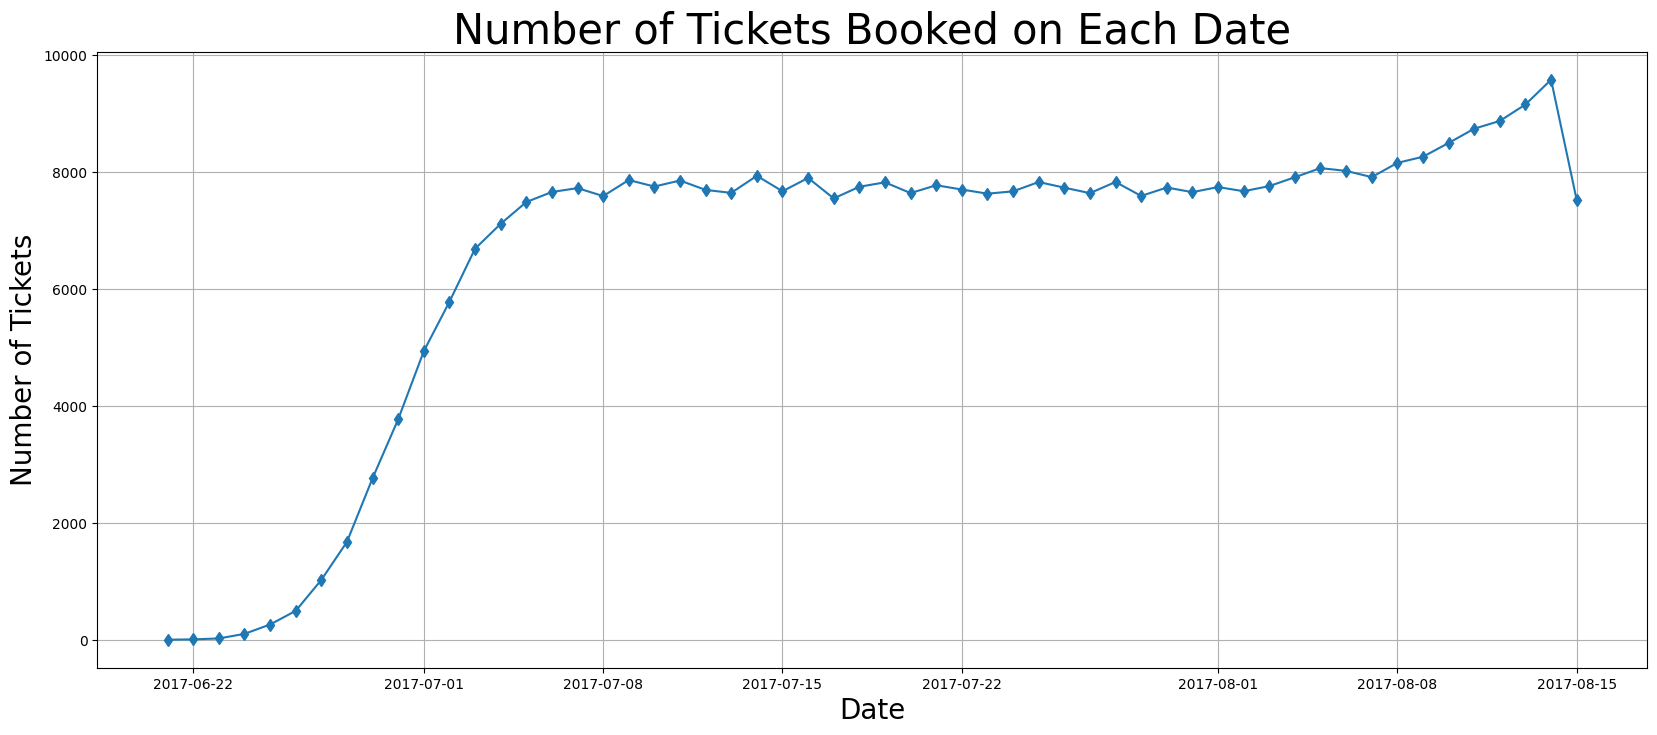

In [18]:
%matplotlib inline
tickets_time = pd.read_sql_query("""select * from tickets join bookings
                                    on tickets.book_ref = bookings.book_ref""", connection)
tickets_time["book_date"] = pd.to_datetime(tickets_time["book_date"])
tickets_time["date"] = tickets_time["book_date"].dt.date
tickets_count = tickets_time.groupby("date")[['date']].count()
tickets_count.to_csv("Ticket_counts_per_date.csv")

plt.figure(figsize = (20,8))
plt.plot(tickets_count.index, tickets_count['date'], marker = "d")
plt.title('Number of Tickets Booked on Each Date', fontsize=30)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Number of Tickets', fontsize=20)
plt.grid('c')
plt.show()

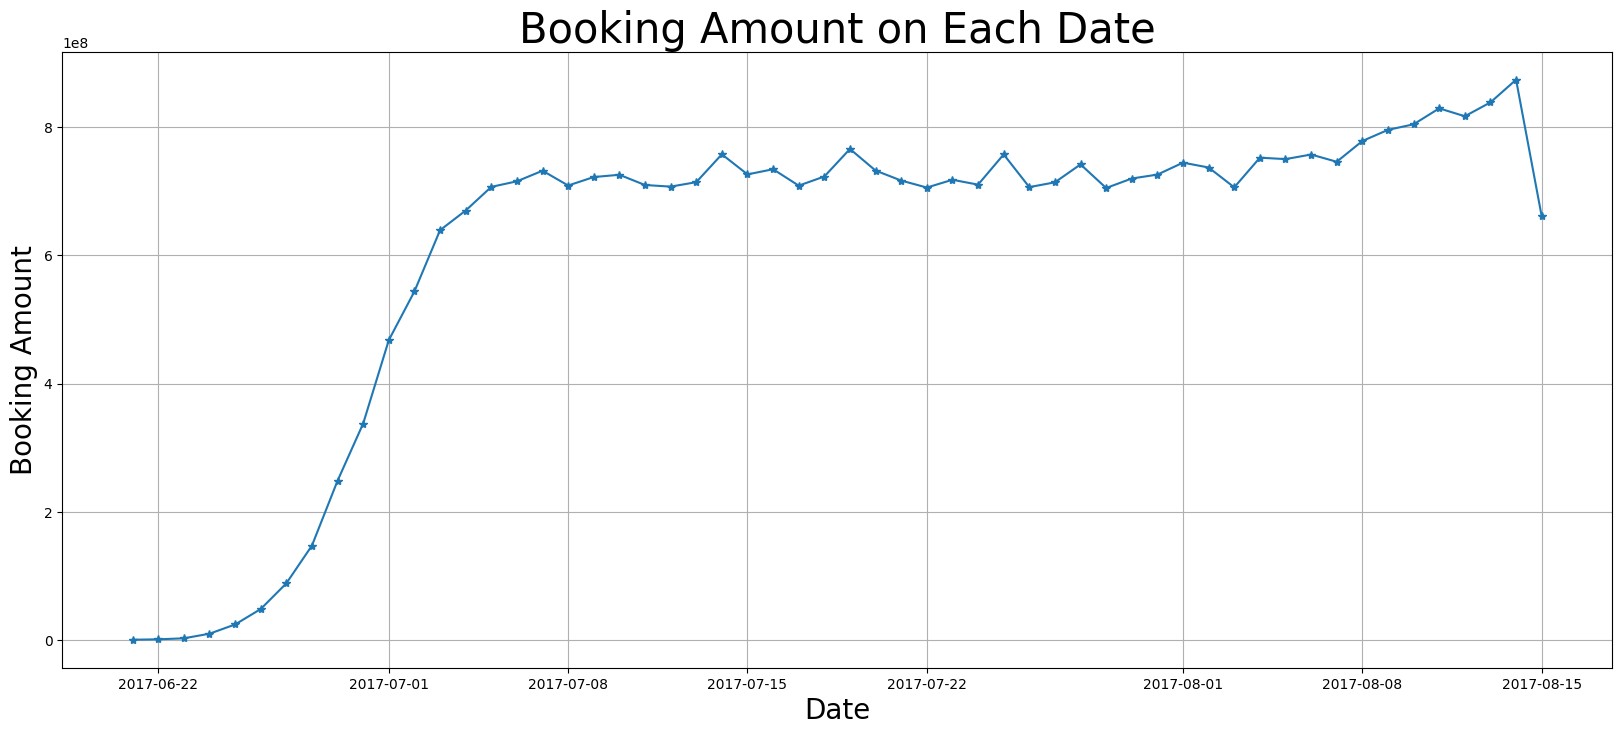

In [19]:
%matplotlib inline
tickets_time = pd.read_sql_query("""select * from tickets join bookings
                                    on tickets.book_ref = bookings.book_ref""", connection)
tickets_time["book_date"] = pd.to_datetime(tickets_time["book_date"])
tickets_time["date"] = tickets_time["book_date"].dt.date
booking_amount = tickets_time.groupby("date")[['total_amount']].sum()
booking_amount.to_csv("Booking_Amount_per_date.csv")

plt.figure(figsize = (20,8))
plt.plot(booking_amount.index, booking_amount['total_amount'], marker = "*")
plt.title('Booking Amount on Each Date', fontsize=30)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Booking Amount', fontsize=20)
plt.grid('c')
plt.show()

Calculate the average charges for each aircraft with different fare conditions?

<Axes: xlabel='aircraft_code', ylabel='avg_amount'>

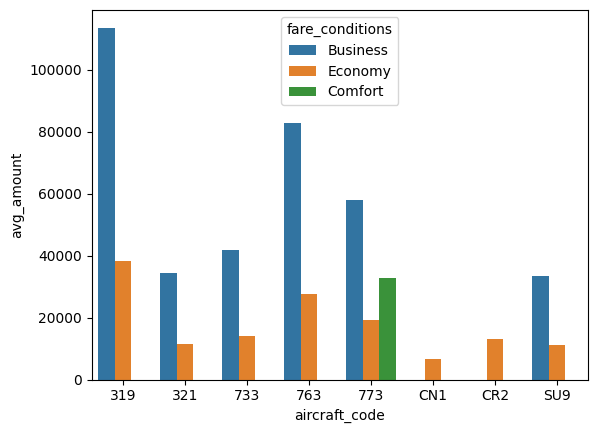

In [20]:
fare_cond = pd.read_sql_query("""select fare_conditions, aircraft_code, avg(amount) as avg_amount from ticket_flights inner join
                                 flights on ticket_flights.flight_id = flights.flight_id
                                 group by aircraft_code, fare_conditions""", connection)
fare_cond.to_csv('Fare_Cond.csv')

sns.barplot(data=fare_cond, x = "aircraft_code", y = "avg_amount", hue = "fare_conditions")

For each aircraft, calculate the total revenue per year and the average revenue per ticket.

In [21]:
#total revenue per year
r_per_year = pd.read_sql_query("""select aircraft_code, total_tickets, total_revenue, total_revenue/total_tickets as avg_rev_per_ticket from
                                  (select aircraft_code, count(*) as total_tickets, sum(amount) as total_revenue from ticket_flights join flights
                                  on ticket_flights.flight_id = flights.flight_id
                                  group by aircraft_code)""", connection)
revenue = r_per_year.to_csv('Revenue.csv')
print(r_per_year)

  aircraft_code  total_tickets  total_revenue  avg_rev_per_ticket
0           319          52853     2706163100               51201
1           321         107129     1638164100               15291
2           733          86102     1426552100               16568
3           763         124774     4371277100               35033
4           773         144376     3431205500               23765
5           CN1          14672       96373800                6568
6           CR2         150122     1982760500               13207
7           SU9         365698     5114484700               13985


Calculate the average occupancy per aircraft

In [22]:
main_a = pd.read_sql_query("""select aircraft_code, flights.flight_id, count(*) as seats_count from boarding_passes
                              join flights on boarding_passes.flight_id = flights.flight_id
                              group by aircraft_code, flights.flight_id""", connection)
main_a.head()

,aircraft_code,flight_id,seats_count
0,319,1162,51
1,319,1166,54
2,319,1167,57
3,319,1168,60
4,319,1170,58


In [23]:
main_b = pd.read_sql_query("""select aircraft_code,count(*) as num_seats from seats
                              group by aircraft_code""", connection)
main_b.head()

,aircraft_code,num_seats
0,319,116
1,320,140
2,321,170
3,733,130
4,763,222


This is a bit of hard code

In [24]:
occupancy_rate = pd.read_sql_query("""select a.aircraft_code, avg(a.seats_count) as booked_seats, b.num_seats, avg(a.seats_count)/b.num_seats as occupancy_rate from
                                      (select aircraft_code, flights.flight_id, count(*) as seats_count from boarding_passes
                                      join flights on boarding_passes.flight_id = flights.flight_id
                                      group by aircraft_code, flights.flight_id) as a
                                      join
                                      (select aircraft_code,count(*) as num_seats from seats
                                      group by aircraft_code) as b
                                      on a.aircraft_code = b.aircraft_code group by a.aircraft_code""", connection)
occupancy_rate

,aircraft_code,booked_seats,num_seats,occupancy_rate
0,319,53.583181,116,0.461924
1,321,88.809231,170,0.522407
2,733,80.255462,130,0.617350
3,763,113.937294,222,0.513231
4,773,264.925806,402,0.659019
5,CN1,6.004431,12,0.500369
6,CR2,21.482847,50,0.429657
7,SU9,56.812113,97,0.585692


In [25]:
#increasing occupany rate by 10%
occupancy_rate["Inc_occupancy"] = occupancy_rate['occupancy_rate']*1.10
occupancy_rate

,aircraft_code,booked_seats,num_seats,occupancy_rate,Inc_occupancy
0,319,53.583181,116,0.461924,0.508116
1,321,88.809231,170,0.522407,0.574648
2,733,80.255462,130,0.617350,0.679085
3,763,113.937294,222,0.513231,0.564554
4,773,264.925806,402,0.659019,0.724921
5,CN1,6.004431,12,0.500369,0.550406
6,CR2,21.482847,50,0.429657,0.472623
7,SU9,56.812113,97,0.585692,0.644261


In [26]:
pd.set_option("display.float_format", str) #is used to convert (e^10524) to real number

In [30]:
total_revenue = pd.read_sql_query("""select aircraft_code, sum(amount) as total_revenue from
                                     ticket_flights join flights on
                                     ticket_flights.flight_id = flights.flight_id
                                     group by aircraft_code""", connection)

total_revenue.to_csv("Total_rev.csv")
total_revenue

,aircraft_code,total_revenue
0,319,2706163100
1,321,1638164100
2,733,1426552100
3,763,4371277100
4,773,3431205500
5,CN1,96373800
6,CR2,1982760500
7,SU9,5114484700


In [29]:
occupancy_rate["Inc_Annual_Turnover"] = (total_revenue['total_revenue']/occupancy_rate['occupancy_rate']) * occupancy_rate['Inc_occupancy']

occupancy_rate.to_csv("Occupancy_Rate.csv")
occupancy_rate.to_excel("Occupancy_rate.xlsx")
occupancy_rate

,aircraft_code,booked_seats,num_seats,occupancy_rate,Inc_occupancy,Inc_Annual_Turnover
0,319,53.58318098720292,116,0.46192397402761143,0.5081163714303726,2976779410.0
1,321,88.80923076923077,170,0.5224072398190045,0.574647963800905,1801980510.0
2,733,80.25546218487395,130,0.617349709114415,0.6790846800258565,1569207310.0000002
3,763,113.93729372937294,222,0.5132310528350132,0.5645541581185146,4808404810.0
4,773,264.9258064516129,402,0.659019419033863,0.7249213609372493,3774326050.0000005
5,CN1,6.004431314623338,12,0.5003692762186115,0.5504062038404727,106011180.00000001
6,CR2,21.48284690220174,50,0.42965693804403476,0.4726226318484383,2181036550.0
7,SU9,56.81211267605634,97,0.5856918832583128,0.6442610715841441,5625933170.000001
